# Compare composition of Huang dataset to Earthchem

In [13]:
using Plots
using DelimitedFiles
using HDF5
using Statistics
using StatsBase

In [4]:
huang, h = readdlm("../data/huang/bsr_ignmajors_1.csv", ',', header=true)
#huang, h = readdlm("../data/huang2/bsr_ignmajors_1.csv", ',', header=true)
ec, h = readdlm("../data/base/bsr_ignmajors_1.csv", ',', header=true)
huang_orig, ho = readdlm("../resources/huang.csv", ',', header=true)

([48.381772527924696 1.708879218811156 … 2.608878666666667 0.39215833333333333; 46.0694103992572 1.3842638165596868 … 2.617444 0.38944833333333334; … ; 54.61 1.47 … 4.08 -1.0; 55.93 0.57 … 5.7 -1.0], AbstractString["SiO2" "TiO2" … "Yb" "Lu"])

In [69]:
huang_orig[1,:] ./ totals[1]

49-element Vector{Float64}:
 0.49892074218911525
 0.017622241675182976
 0.13826997542576633
 0.15478887425199223
 0.060929054453193764
 0.10442050072954755
 0.019694239823254547
 0.005354371451947331
 0.0
 0.0
 0.002359205812160701
 0.002195087146966913
 0.0
 ⋮
 0.03110357807755965
 0.15234710295898546
 0.03914514400237131
 0.014026329617849956
 0.048117626725393936
 0.007636662267678508
 0.04995067563647673
 0.010268536039044074
 0.029161453977178998
 0.004226440155084992
 0.026903183009746486
 0.004044000798221802

In [74]:
huang_orig[huang_orig .== -1] .= 0
totals = sum(huang_orig[:,1:10], dims=2)
huang_orig_norm = zeros(size(huang_orig)) 
for i in 1:size(huang_orig_norm)[1]
    huang_orig_norm[i,:] .= 100 .* huang_orig[i,:] ./ totals[i]
end

huang_orig_norm

7020×49 Matrix{Float64}:
 49.8921  1.76222   13.827    15.4789  …  0.422644  2.69032  0.4044
 47.8236  1.43697   15.3064   14.2736     0.422191  2.71711  0.404278
 46.0004  4.48998   13.4393   17.1782     0.80079   4.71794  0.587611
 49.5471  1.82305   14.3569   12.3934     0.577289  3.59158  0.494696
 50.1324  1.35059   14.7309   13.8762     0.454737  2.9469   0.444335
 49.8159  2.34082   13.0905   16.4262  …  0.74324   4.87065  0.727079
 49.8461  2.43646   13.6024   16.7228     0.0       0.0      0.0
 50.2266  1.81378   14.7407   12.2064     0.376219  2.41988  0.357214
 50.5976  1.34147   15.4596   13.4761     0.428227  2.84242  0.42462
 50.3666  1.42774   15.517    12.9326     0.48757   3.30232  0.492077
 52.5493  0.979619  14.856    11.0359  …  0.350596  2.28836  0.343317
 47.792   1.69083   16.6056   11.6459     0.4568    2.94425  0.439614
 50.3123  2.40759   14.6658   13.9259     0.873326  5.72481  0.872913
  ⋮                                    ⋱                     
 74.4117  1

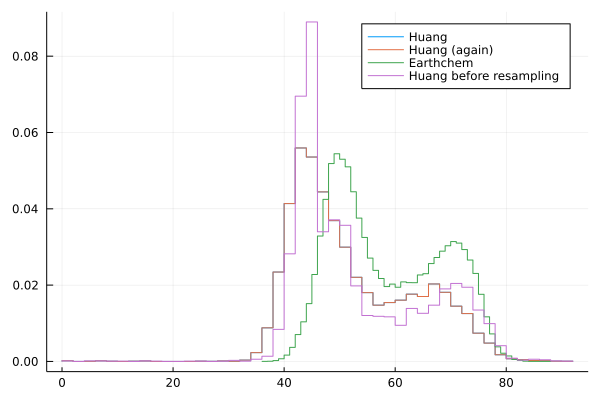

In [5]:
stephist(huang1[:,2], label="Huang", normalize=:pdf)
stephist!(huang[:,2], label="Huang (again)", normalize=:pdf)
stephist!(ec[:,2], label="Earthchem", normalize=:pdf)
hist = stephist!(huang_orig[:,1], label="Huang before resampling", normalize=:pdf)

In [19]:
res = h5read("../data/huang/perplex_out_3.h5", "results")
sum(isnan.(res[2,1,:]))

0

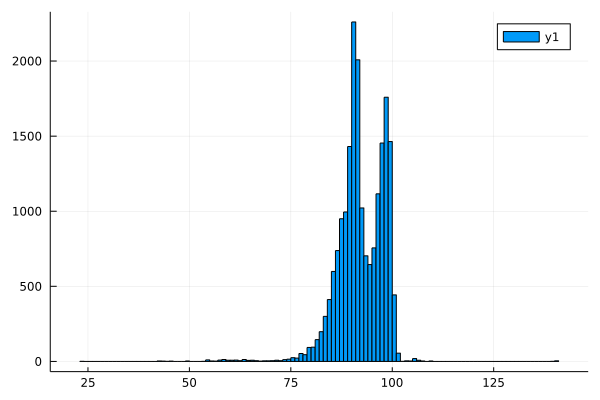

In [39]:
majors = huang[:,2:11]
histogram(sum(majors, dims=2))

In [11]:
println(mean(huang[:,2]))
println(mean(ec[:,2]))


52.30028428949999
58.682664689199996


In [20]:
percentile(ec[:,2], 90)

72.80390500000001